# Avoid Overfitting By Early Stopping With XGBoost

## 0. Introduction

This notebook contains:
  1. Monitoring training performance with XGBoost
  2. Evaluate XGBoost model with learning curves
  3. Early stopping with XGBoost

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
pima = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"

## 1. Monitoring training performance with XGBoost

In [3]:
data = pd.read_csv(pima, header=None)
data.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
X, y = data.iloc[:, :-1], data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_metric='error', eval_set=eval_set, verbose=True)
y_preds = model.predict(X_test)
score = accuracy_score(y_test, y_preds)
print(f"Accuracy: {score*100:.2f}%")

[0]	validation_0-error:0.26623
[1]	validation_0-error:0.24675
[2]	validation_0-error:0.24026
[3]	validation_0-error:0.24675
[4]	validation_0-error:0.26623
[5]	validation_0-error:0.24675
[6]	validation_0-error:0.25974
[7]	validation_0-error:0.25325
[8]	validation_0-error:0.26623
[9]	validation_0-error:0.26623
[10]	validation_0-error:0.26623
[11]	validation_0-error:0.27273
[12]	validation_0-error:0.26623
[13]	validation_0-error:0.26623
[14]	validation_0-error:0.29221
[15]	validation_0-error:0.27922
[16]	validation_0-error:0.29221
[17]	validation_0-error:0.29221
[18]	validation_0-error:0.28571
[19]	validation_0-error:0.28571
[20]	validation_0-error:0.29221
[21]	validation_0-error:0.29221
[22]	validation_0-error:0.29870
[23]	validation_0-error:0.29870
[24]	validation_0-error:0.29221
[25]	validation_0-error:0.29870
[26]	validation_0-error:0.29221
[27]	validation_0-error:0.30519
[28]	validation_0-error:0.31169
[29]	validation_0-error:0.30519
[30]	validation_0-error:0.30519


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-error:0.30519
[32]	validation_0-error:0.31169
[33]	validation_0-error:0.31169
[34]	validation_0-error:0.29870
[35]	validation_0-error:0.29870
[36]	validation_0-error:0.31818
[37]	validation_0-error:0.31818
[38]	validation_0-error:0.30519
[39]	validation_0-error:0.29870
[40]	validation_0-error:0.30519
[41]	validation_0-error:0.31169
[42]	validation_0-error:0.31818
[43]	validation_0-error:0.31818
[44]	validation_0-error:0.30519
[45]	validation_0-error:0.30519
[46]	validation_0-error:0.30519
[47]	validation_0-error:0.30519
[48]	validation_0-error:0.29870
[49]	validation_0-error:0.31818
[50]	validation_0-error:0.30519
[51]	validation_0-error:0.29870
[52]	validation_0-error:0.29870
[53]	validation_0-error:0.29870
[54]	validation_0-error:0.30519
[55]	validation_0-error:0.30519
[56]	validation_0-error:0.29870
[57]	validation_0-error:0.30519
[58]	validation_0-error:0.30519
[59]	validation_0-error:0.30519
[60]	validation_0-error:0.29870
[61]	validation_0-error:0.31169
[62]	val

## 2. Evaluate XGBoost with learning curve

In [11]:
data = pd.read_csv(pima, header=None)
X, y = data.iloc[:, :-1], data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBClassifier()
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=['error', 'logloss'], eval_set=eval_set, verbose=True)
y_preds = model.predict(X_test)
score = accuracy_score(y_test, y_preds)
print(f"Accuracy: {score*100:.2f}%")

[0]	validation_0-error:0.14821	validation_0-logloss:0.55351	validation_1-error:0.26623	validation_1-logloss:0.59011
[1]	validation_0-error:0.11889	validation_0-logloss:0.46979	validation_1-error:0.24675	validation_1-logloss:0.54671
[2]	validation_0-error:0.11238	validation_0-logloss:0.40937	validation_1-error:0.24026	validation_1-logloss:0.52319
[3]	validation_0-error:0.08958	validation_0-logloss:0.37109	validation_1-error:0.24675	validation_1-logloss:0.50150
[4]	validation_0-error:0.08306	validation_0-logloss:0.33005	validation_1-error:0.26623	validation_1-logloss:0.51085
[5]	validation_0-error:0.07492	validation_0-logloss:0.29927	validation_1-error:0.24675	validation_1-logloss:0.49548
[6]	validation_0-error:0.06678	validation_0-logloss:0.27624	validation_1-error:0.25974	validation_1-logloss:0.49588


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-error:0.06189	validation_0-logloss:0.26149	validation_1-error:0.25325	validation_1-logloss:0.49676
[8]	validation_0-error:0.05375	validation_0-logloss:0.24446	validation_1-error:0.26623	validation_1-logloss:0.50208
[9]	validation_0-error:0.04723	validation_0-logloss:0.23354	validation_1-error:0.26623	validation_1-logloss:0.51131
[10]	validation_0-error:0.04235	validation_0-logloss:0.21956	validation_1-error:0.26623	validation_1-logloss:0.51004
[11]	validation_0-error:0.03257	validation_0-logloss:0.20757	validation_1-error:0.27273	validation_1-logloss:0.51456
[12]	validation_0-error:0.03094	validation_0-logloss:0.19895	validation_1-error:0.26623	validation_1-logloss:0.52871
[13]	validation_0-error:0.02606	validation_0-logloss:0.18684	validation_1-error:0.26623	validation_1-logloss:0.53347
[14]	validation_0-error:0.01792	validation_0-logloss:0.17538	validation_1-error:0.29221	validation_1-logloss:0.54392
[15]	validation_0-error:0.01629	validation_0-logloss:0.16648	valida

In [12]:
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

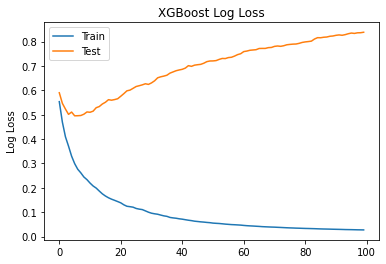

In [14]:
# Plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

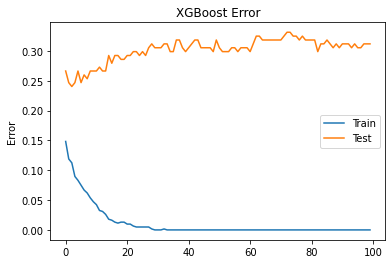

In [15]:
# Plot error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Error')
plt.title('XGBoost Error')
plt.show()

## 3. Early stopping with XGBoost

In [17]:
data = pd.read_csv(pima, header=None)
X, y = data.iloc[:, :-1], data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBClassifier()
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric='error', eval_set=eval_set, early_stopping_rounds=5)
y_preds = model.predict(X_test)
score = accuracy_score(y_test, y_preds)
print(f"Accuracy: {score*100:.2f}%")

[0]	validation_0-error:0.14821	validation_1-error:0.26623
[1]	validation_0-error:0.11889	validation_1-error:0.24675
[2]	validation_0-error:0.11238	validation_1-error:0.24026
[3]	validation_0-error:0.08958	validation_1-error:0.24675
[4]	validation_0-error:0.08306	validation_1-error:0.26623
[5]	validation_0-error:0.07492	validation_1-error:0.24675
[6]	validation_0-error:0.06678	validation_1-error:0.25974
[7]	validation_0-error:0.06189	validation_1-error:0.25325
Accuracy: 75.97%


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
